# Import Data and Libraries

In [2]:
import pyspark
from pyspark.sql import SparkSession
from google.colab import files, drive
drive.mount('/content/drive')

# file location
loc = '/content/drive/MyDrive/Machine learning folder/Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

spark = SparkSession.builder.appName('customer_churn').getOrCreate()
spark

Mounted at /content/drive


In [3]:
df = spark.read.csv(loc, header = True, inferSchema=True)
df.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|  

In [4]:
# see datatype (schema if Pyspark) by using printSchema()
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [5]:
# Find the shape of the DataFrame (number of rows and columns)
num_rows = df.count()
num_cols = len(df.columns)

print(f"Shape of the DataFrame: ({num_rows}, {num_cols})")

Shape of the DataFrame: (7043, 21)


In [6]:
# change some datatype
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, DoubleType

df = df.withColumn('TotalCharges', col('TotalCharges').cast(DoubleType()))
df = df.withColumn('tenure', col('tenure').cast(IntegerType()))
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



# Cleaning Step

In [7]:
# find missing value
from pyspark.sql.functions import isnan, when, count, col
missing_counts = df.select([count(when(isnan(c), c)).alias(c) for c in df.columns])
missing_counts.show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|         0|     0|            0|      0|         0|     0|           0|            0|              0|             0|           0|               0|          0|          0|              0|       0|               0| 

In [8]:
# Find duplicate data
from pyspark.sql.functions import count

duplicate_counts = df.groupBy(df.columns).agg(count("*").alias("count")).where("count > 1")
duplicate_counts.show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|count|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-----+
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+

# Explorateory Data Analysis

## Demographic and Churn

In [9]:
# Import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import when
# set cmap
colors = 'tab10'

df = df.withColumn('Churn_val', when(df['Churn'] == 'Yes', 1).otherwise(0))
df.printSchema()
df.select('Churn', 'Churn_val').show(5)

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)
 |-- Churn_val: integer (nullable = false)

+-----+---------+
|Churn|Churn_val|
+-

### Dependencies and Churn

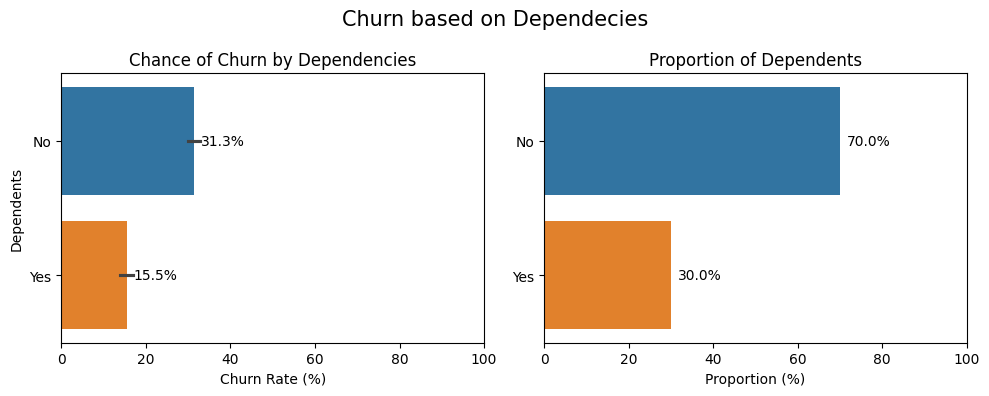

In [10]:
# dependents vs churn
dep_churn = df[['Dependents', 'Churn', 'Churn_val']].toPandas()
dep_percent = dep_churn['Dependents'].value_counts(normalize = True)
fig, axs = plt.subplots(1,2,figsize = (10,4))
sns.barplot(y = 'Dependents', x = dep_churn.Churn_val*100, data = dep_churn, ax = axs[0], hue = dep_churn.Dependents, legend = False, orient='h')
sns.barplot(y = dep_churn.Dependents.unique(), x = dep_percent*100, ax = axs[1], hue = dep_churn.Dependents.unique(), legend = False, orient='h')
axs[0].set_xlabel('Churn Rate (%)')
axs[0].set_title('Chance of Churn by Dependencies')
axs[0].set_xlim(0,100)
axs[1].set_xlim(0,100)
axs[1].set_title('Proportion of Dependents')
axs[1].set_xlabel('Proportion (%)')
plt.suptitle('Churn based on Dependecies', fontsize = 15)

# Add numbers to the bars in the first plot with padding
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%.1f%%', padding=5) # Add padding

# Add numbers to the bars in the second plot with padding
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%.1f%%', padding=5) # Add padding
#plt.savefig('depedencies_churn.png', bbox_inches = 'tight', dpi = 300)
#files.download('depedencies_churn.png')
fig.tight_layout()
plt.show()

### Gender based on Churn

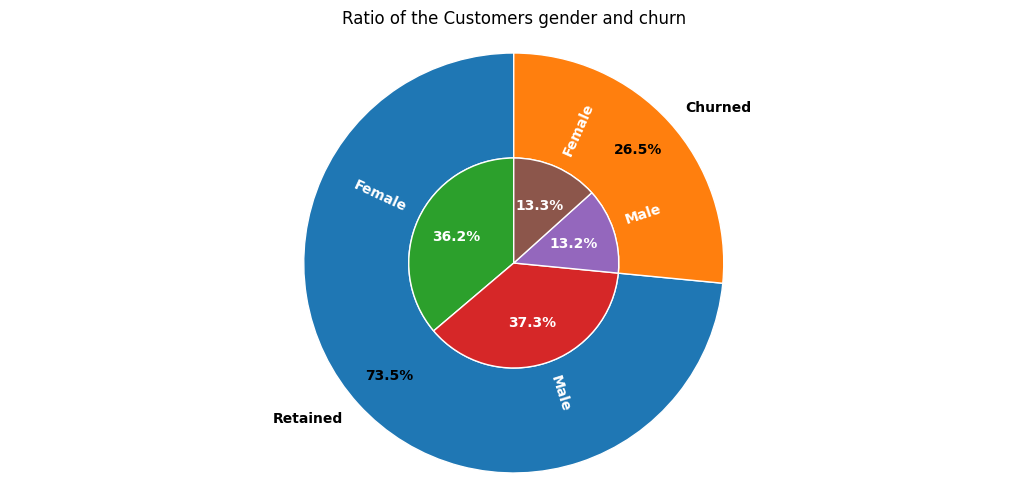

In [11]:
# Gender based on churn
retain_churn_label = ['Retained', 'Churned']

from pyspark.sql.functions import count
import pandas as pd # Import pandas

width = 0.5

churn_counts = df.groupBy('Churn').agg(count('*').alias('count')).toPandas()
churn_counts['percentage'] = churn_counts['count'] / churn_counts['count'].sum() * 100
fig, axs = plt.subplots(figsize = (13,6))
# Convert 'count' column to numeric before plotting
axs.pie(churn_counts['count'],
        labels = retain_churn_label,
        autopct = '%1.1f%%',
        pctdistance = 0.8,
        textprops={'color':'black', 'fontweight':'bold'}, radius = 1,
        startangle = 90,
        wedgeprops={'width':0.5, 'edgecolor': 'w'})


churn_gender = df.groupBy(['Churn', 'gender']).agg(count('*').alias('count')).toPandas()
churn_gender['percentage'] = round(churn_gender['count'] / churn_gender['count'].sum() * 100,2)

axs.pie(churn_gender['count'],
        labels = list(churn_gender.gender),
        autopct="%1.1f%%",
        startangle = 90,
        textprops={'color':'white', 'fontweight':'bold'},
        wedgeprops={'width':0.5, 'edgecolor':'w'},
        radius = 1-width,
        rotatelabels = True)

axs.set_title('Ratio of the Customers gender and churn')
axs.axis('equal')

# Create a bar chart to visualize churn by gender
plt.show()

### Senior Citizen-based with Churn

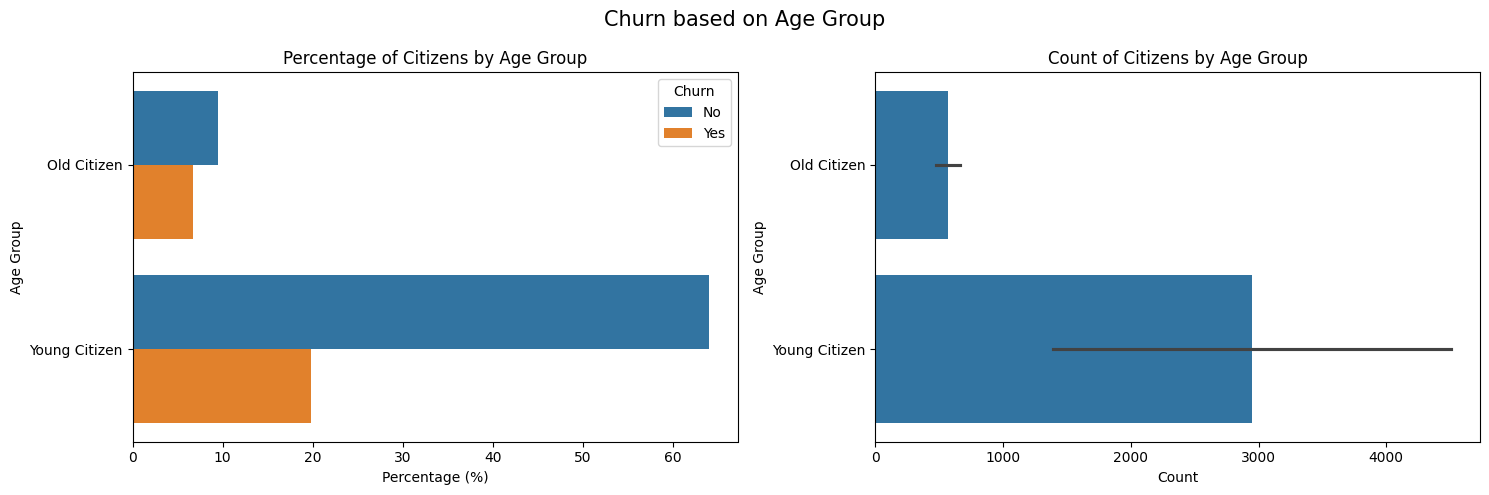

In [12]:
sen_data = df.groupBy(['SeniorCitizen', 'Churn']).agg(count('*').alias('count')).toPandas()
sen_data['percentage'] = round(sen_data['count'] / sen_data['count'].sum() * 100,2)
map_data = {0: 'Young Citizen', 1: 'Old Citizen'}
sen_data['SeniorCitizen'] = sen_data['SeniorCitizen'].map(map_data)

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.barplot(y = 'SeniorCitizen', x = 'percentage', hue = 'Churn', data = sen_data, ax = ax[0], hue_order=['No', 'Yes'], orient = 'h')
sns.barplot(y = 'SeniorCitizen', x = 'count',  data = sen_data, ax = ax[1], orient = 'h')
ax[0].set_title('Percentage of Citizens by Age Group')
ax[1].set_title('Count of Citizens by Age Group')
ax[0].set_xlabel('Percentage (%)')
ax[1].set_xlabel('Count')
ax[0].set_ylabel('Age Group')
ax[1].set_ylabel('Age Group')
plt.suptitle('Churn based on Age Group', fontsize = 15)
fig.tight_layout()
#plt.savefig('churn_agegroup.png', bbox_inches = 'tight', dpi = 300)
#files.download('churn_agegroup.png')
plt.show()

### Churn based on Customers Marrital Status

In [13]:
partner_churn = df.groupBy(['Partner', 'Churn']).agg(count('*').alias('count')).toPandas()
partner_churn['percentage'] = round(partner_churn['count'] / partner_churn['count'].sum() * 100,2)
partner_churn

,Partner,Churn,count,percentage
0,Yes,Yes,669,9.50
1,No,No,2441,34.66
2,Yes,No,2733,38.80
3,No,Yes,1200,17.04


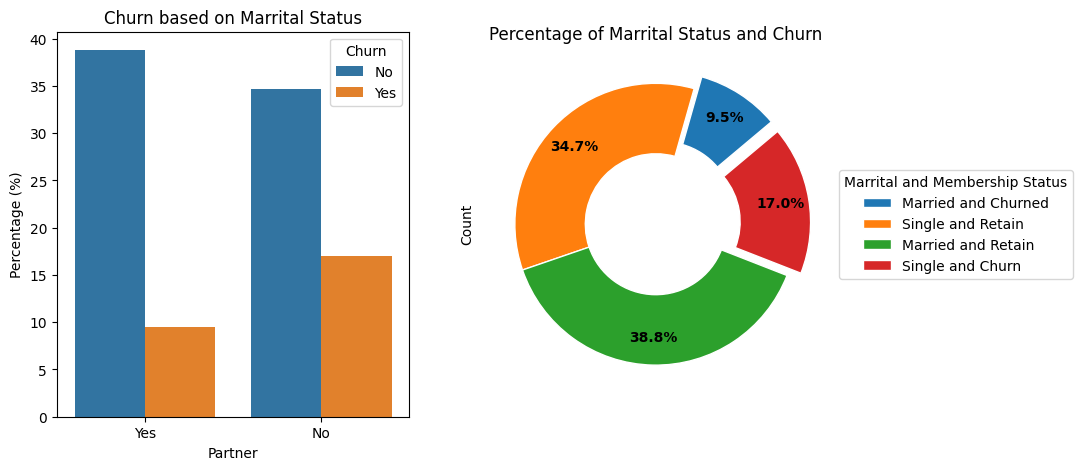

In [14]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
sns.barplot(x = 'Partner', y = 'percentage', hue = 'Churn', data = partner_churn, ax = ax[0], hue_order=['No', 'Yes'])


pie_chart = ax[1].pie(partner_churn['count'],
        autopct = '%1.1f%%',
        pctdistance = 0.8,
        textprops={'color':'black', 'fontweight':'bold'},
        startangle = 40,
        wedgeprops={'width':0.5, 'edgecolor': 'w'}, explode = (0.1,0,0,0.1))

ax[1].legend(pie_chart[0], ['Married and Churned', 'Single and Retain', 'Married and Retain', 'Single and Churn'], title="Marrital and Membership Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


ax[0].set_title('Churn based on Marrital Status')
ax[1].set_title('Percentage of Marrital Status and Churn')
ax[0].set_ylabel('Percentage (%)')
ax[1].set_ylabel('Count')
plt.show()

## Churn based on Telecomuniccation Services

### Filter the Service

In [15]:
# find the most used service
service = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
telco_service = df.select(service)
telco_service.createOrReplaceTempView('services')
# find 'yes' in all service by using sql


### Churn Based on Phone Service

In [16]:
def churn_based(df, col_name):
  churn_group = df.groupBy([col_name, 'Churn']).agg(count('*').alias('count')).toPandas()
  churn_group['percentage'] = round(churn_group['count'] / churn_group['count'].sum() * 100,2)
  return churn_group

def charts(df, col_name, bar_title, pie_title, pie_legend = None):
  fig, ax = plt.subplots(1,2,figsize = (12,6))
  sns.barplot(x = col_name, y = 'percentage', hue = 'Churn', data = df, ax = ax[0])

  pie_chart = ax[1].pie(df['count'],
        autopct = '%1.1f%%',
        pctdistance = 0.8,
        textprops={'color':'black', 'fontweight':'bold'}, radius = 1,
        startangle = 90,
        wedgeprops={'width':0.5, 'edgecolor': 'w'})
  ax[0].set_title(
      bar_title,
      fontsize = 15
  )
  ax[1].set_title(
      pie_title,
      fontsize = 15
  )
  ax[1].legend(pie_legend)
  ax[0].set_ylabel('Percentage (%)')
  ax[1].set_ylabel('Count')
  fig.tight_layout
  plt.show()

def bar_plot(df, col_name, title, xlabel = None, ylabel = None):
  fig = plt.figure(figsize = (12,6))
  sns.barplot(x = col_name, y = 'percentage', hue = 'Churn', data = df, hue_order=['No', 'Yes'])
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.ylim(0,100)
  plt.show()

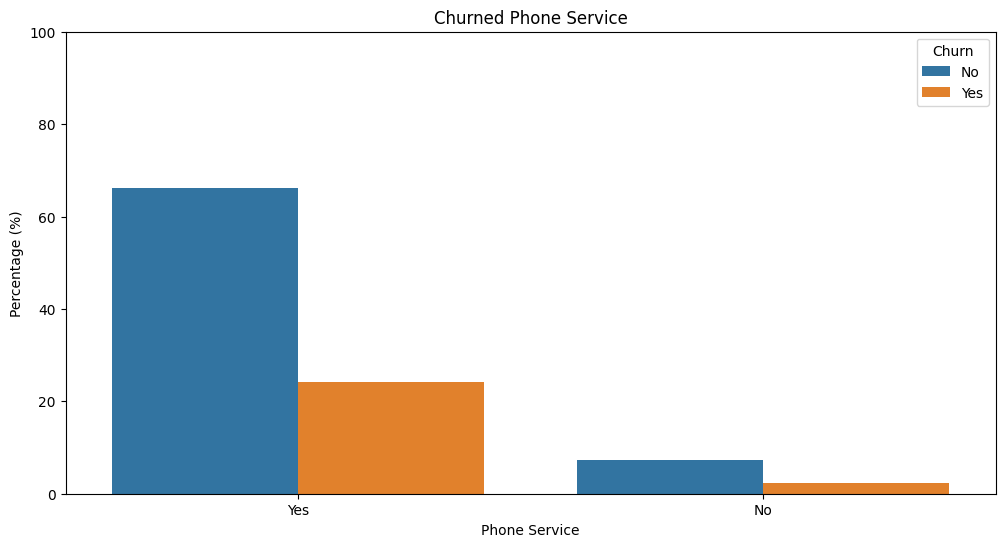

In [17]:
phoneservice = churn_based(df, 'PhoneService')
bar_plot(phoneservice, 'PhoneService', 'Churned Phone Service', xlabel = 'Phone Service', ylabel = 'Percentage (%)')

### Churn based on the Internet Service

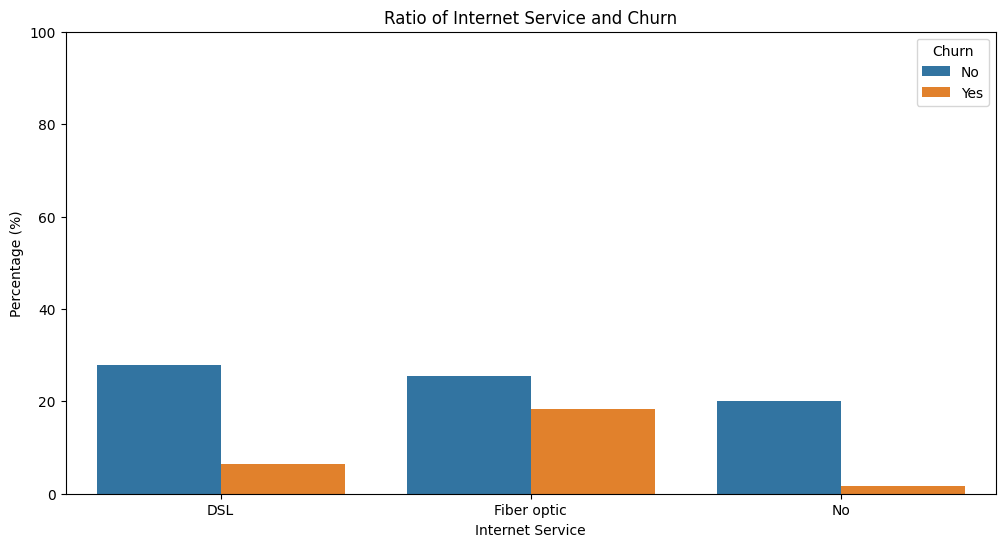

In [18]:
internet_churn = churn_based(df, 'InternetService')
bar_plot(internet_churn, 'InternetService', 'Ratio of Internet Service and Churn', 'Internet Service', 'Percentage (%)')

### Churn based on Online Security

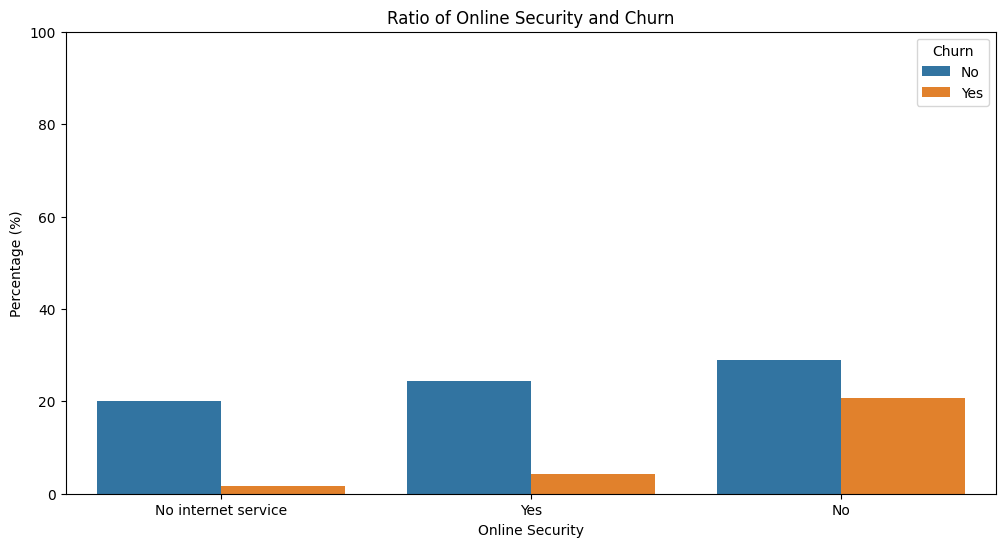

In [19]:
onlinesecurity_churn = churn_based(df, 'OnlineSecurity')
bar_plot(onlinesecurity_churn, 'OnlineSecurity', 'Ratio of Online Security and Churn', 'Online Security', 'Percentage (%)')

### Churn based on Payment Method

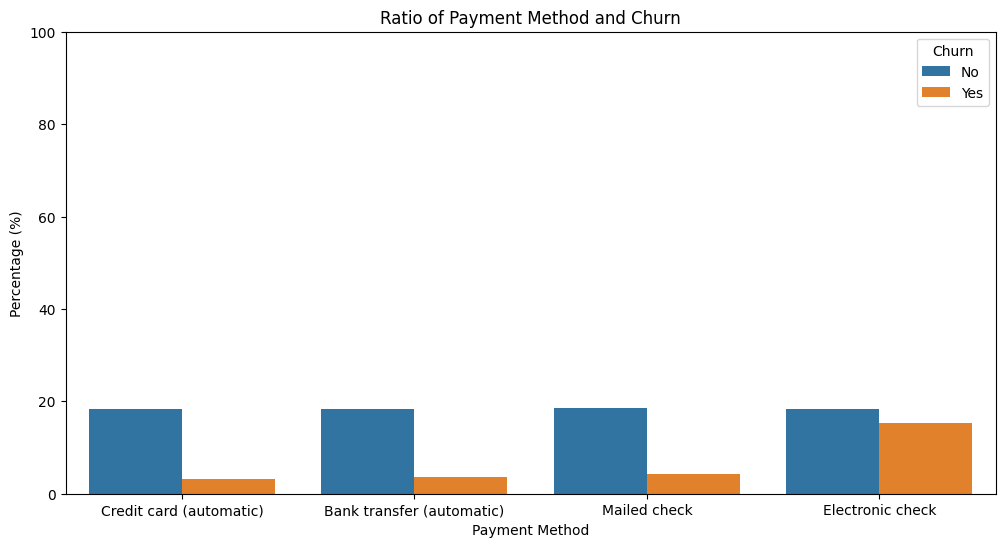

In [20]:
payment = churn_based(df, 'PaymentMethod')
bar_plot(payment, 'PaymentMethod', 'Ratio of Payment Method and Churn', 'Payment Method', 'Percentage (%)')

### Churn based on Paperless Billing

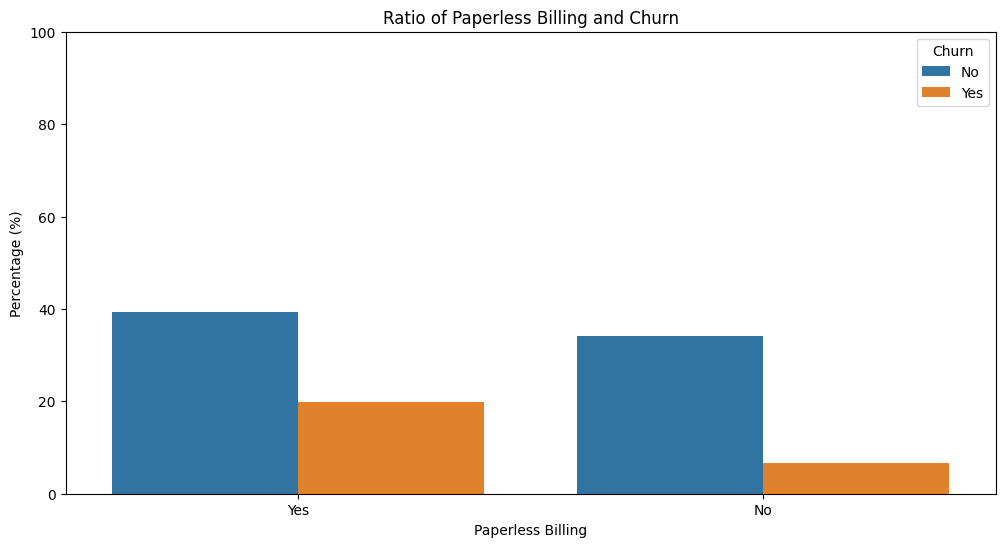

In [21]:
paperless = churn_based(df, 'PaperlessBilling')
bar_plot(paperless, 'PaperlessBilling', 'Ratio of Paperless Billing and Churn', 'Paperless Billing', 'Percentage (%)')

## Churn based on Online Security Service

In [22]:
security_service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
security_churn_data = {} # Initialize an empty dictionary to store churn data for each service
for sec in security_service:
  security_churn_data[sec] = churn_based(df, sec) # Store the churn data in the dictionary with the service name as the key

### Churn based on All Online Protection Service

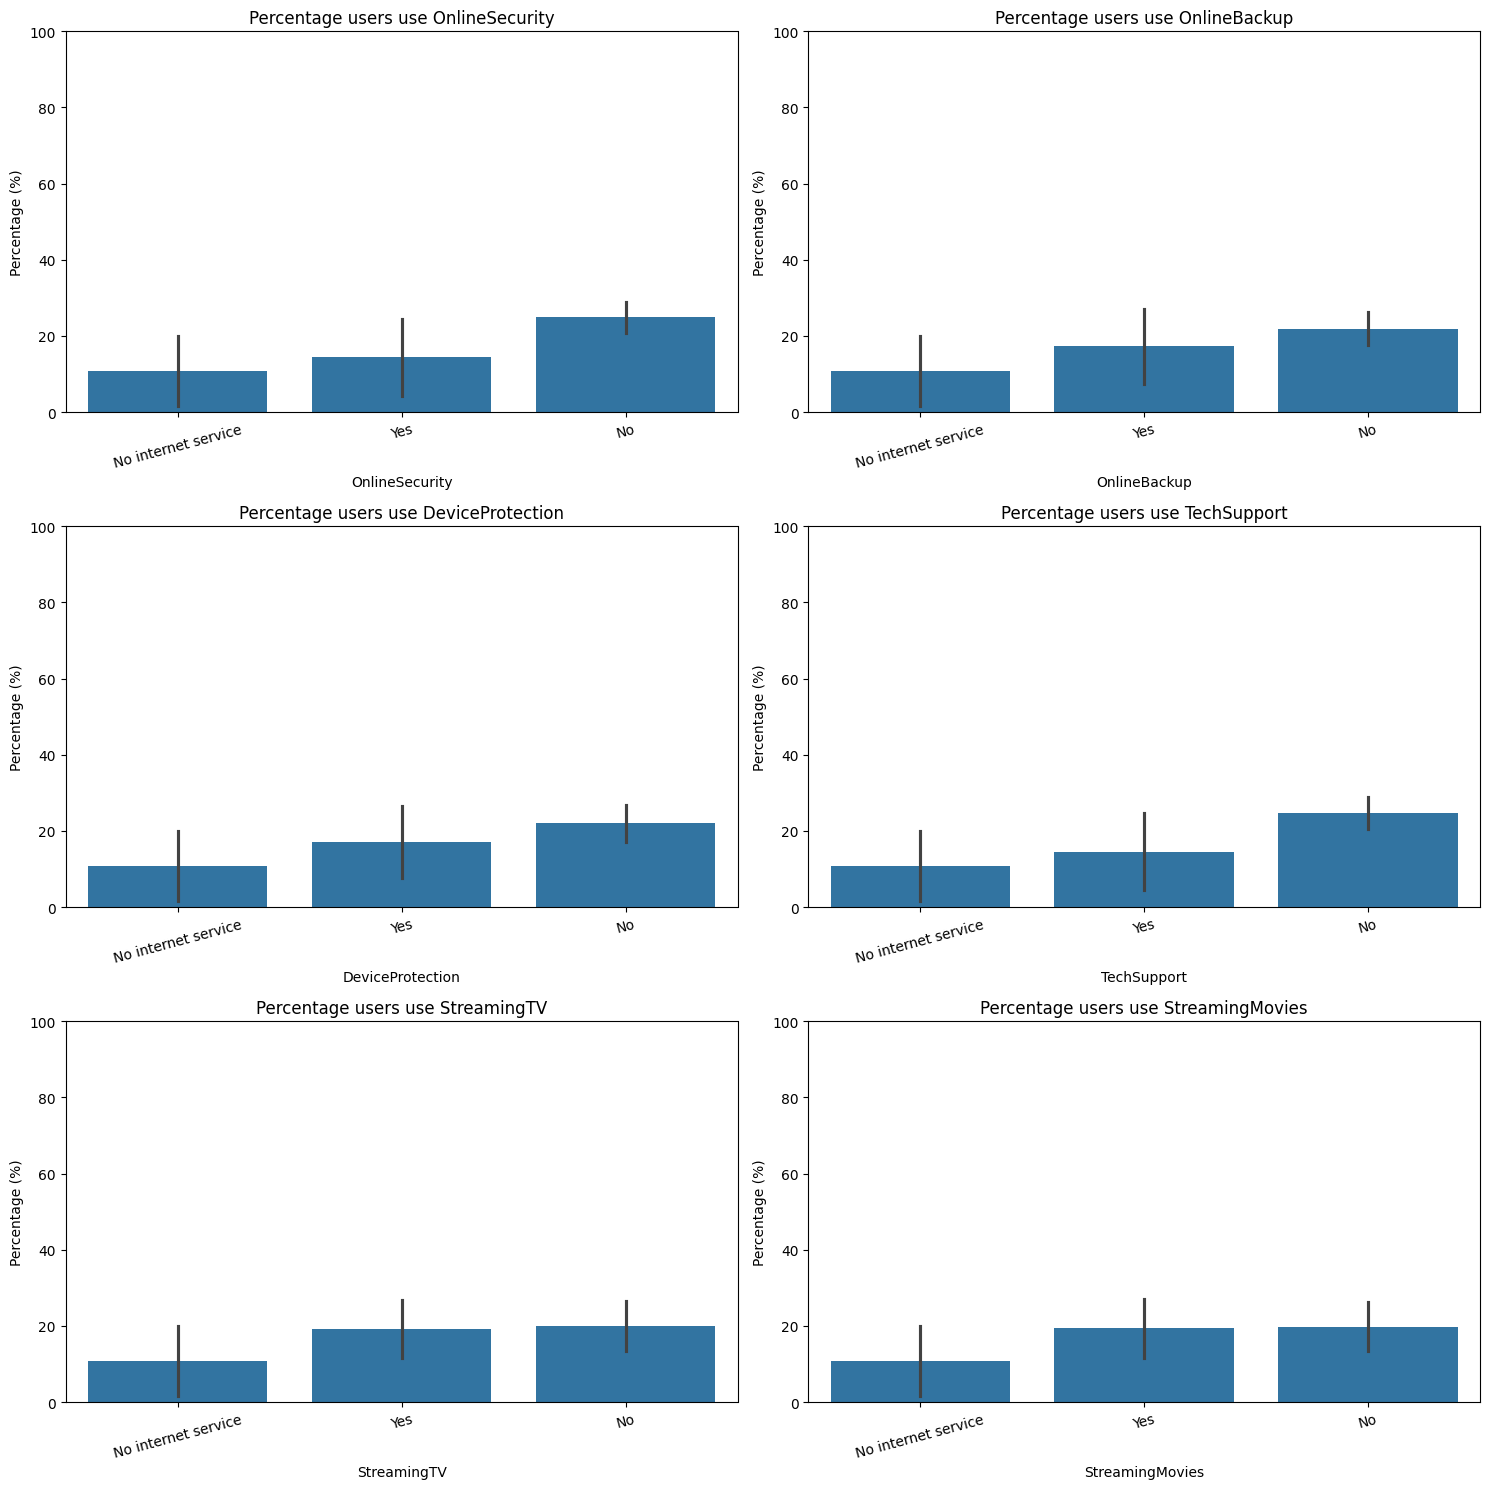

In [23]:
# Combine all security service plots
import math

num_plots = len(security_service) # Use the length of the security_service list
cols = 2  # Number of columns for subplots
rows = math.ceil(num_plots / cols) # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Iterate through the dictionary of churn data
for i, (service_name, churn_df) in enumerate(security_churn_data.items()):
    sns.barplot(x=service_name, y='percentage', data=churn_df, ax=axes[i])
    axes[i].set_title(f'Percentage users use {service_name}')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_ylim(0, 100)
    axes[i].tick_params(axis='x', rotation=15) # Rotate x-axis labels for better readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

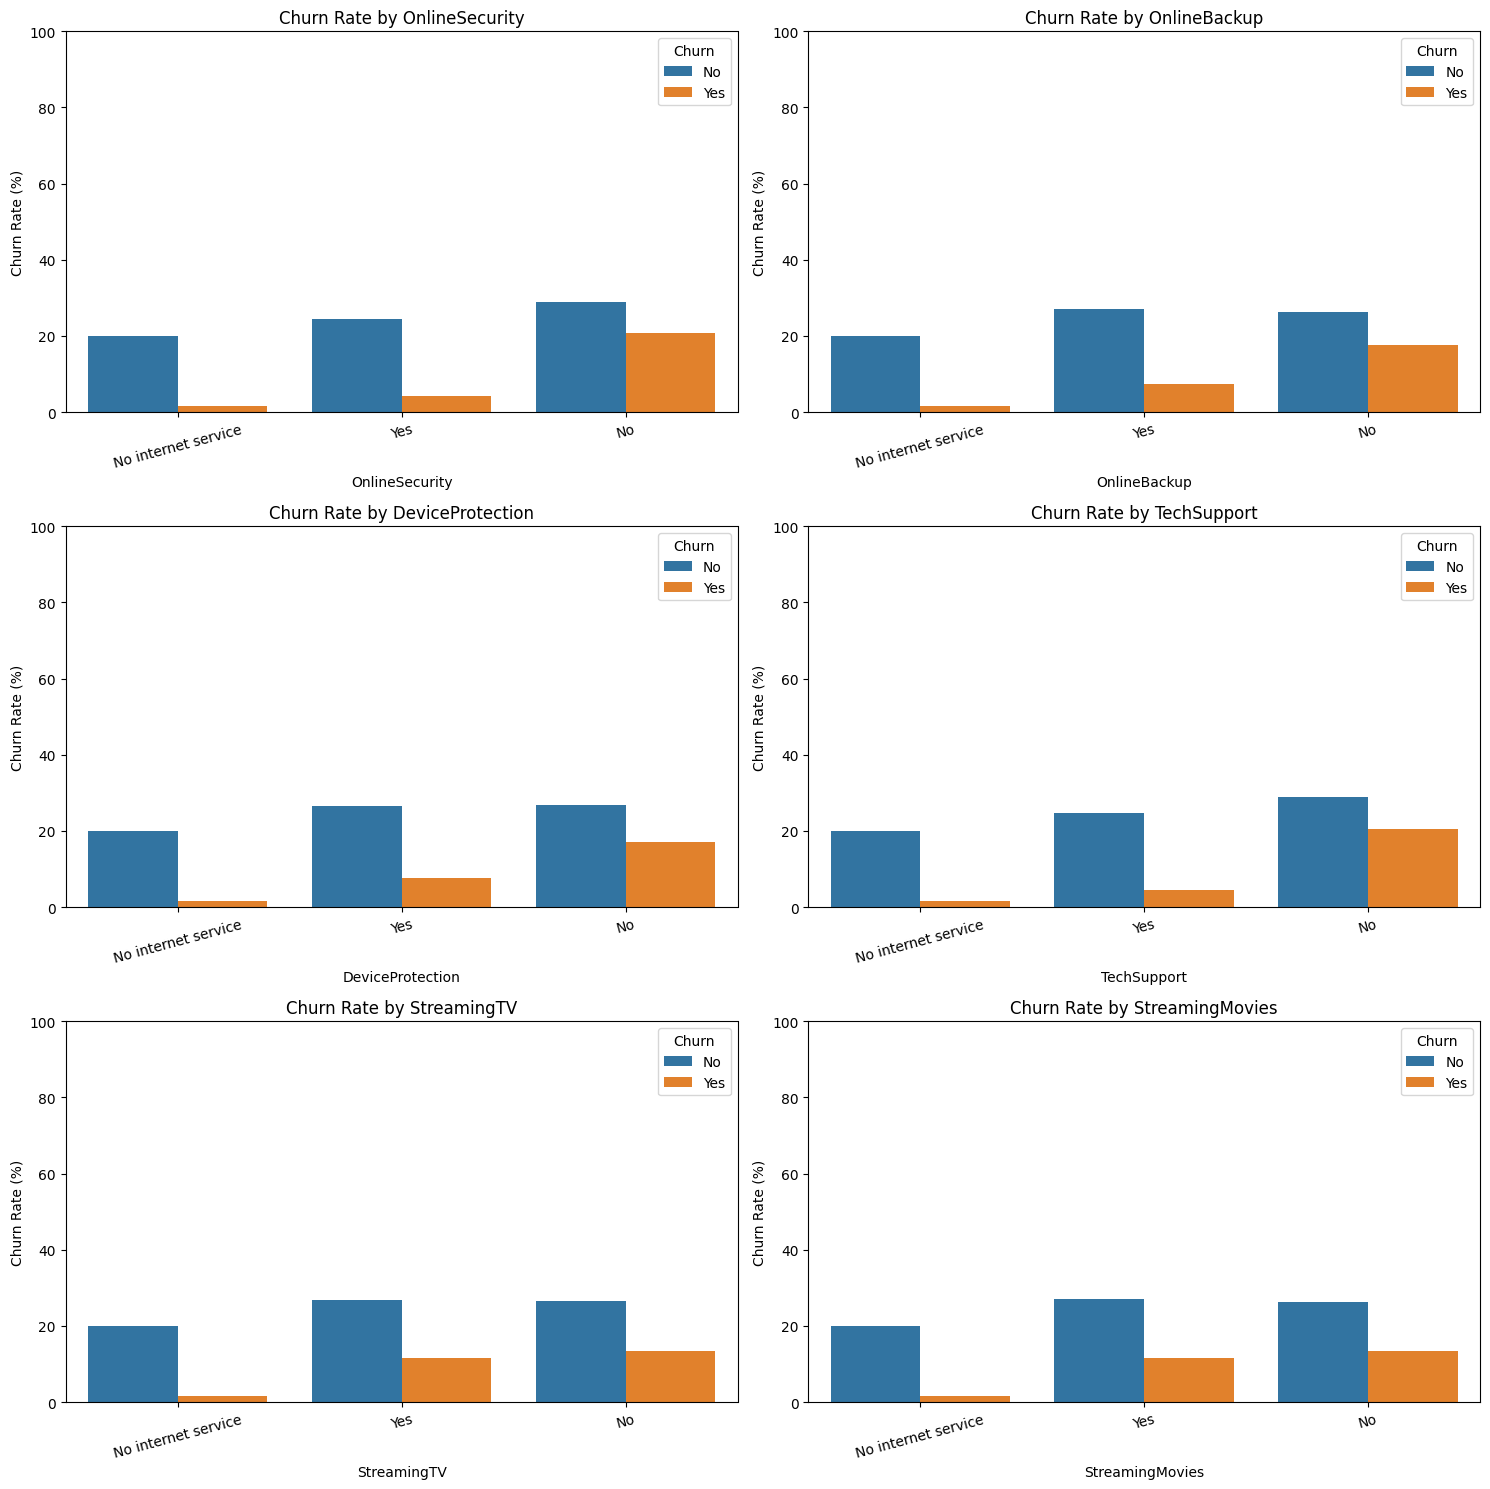

In [24]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

security_service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
cols = 2
rows = math.ceil(len(security_service) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, service_name in enumerate(security_service):
    # Get the churn data for the current service from the dictionary
    churn_df = security_churn_data[service_name]

    sns.barplot(x=service_name, y='percentage', hue='Churn', data=churn_df, ax=axes[i], hue_order=['No', 'Yes'])
    axes[i].set_title(f'Churn Rate by {service_name}')
    axes[i].set_ylabel('Churn Rate (%)')
    axes[i].set_ylim(0, 100)
    axes[i].tick_params(axis='x', rotation=15)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Tenure and Churn Problem


### Tenure Distribution

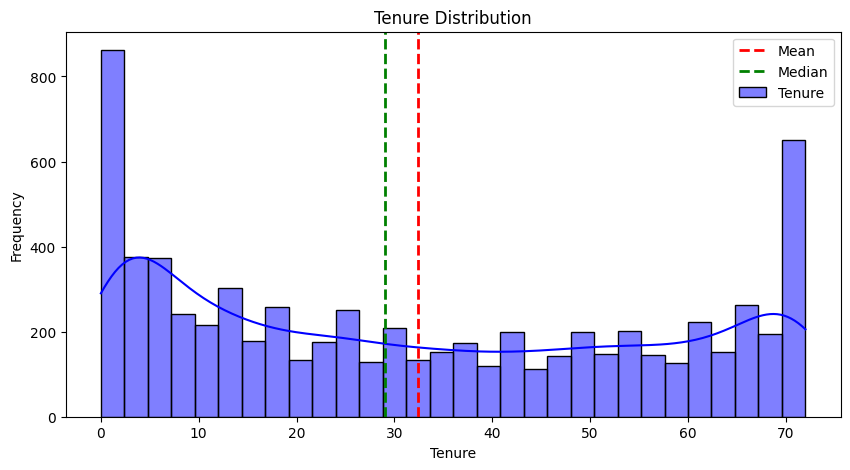

In [25]:
# Select some feature related to charges, tenure, and churn
charges = ['MonthlyCharges', 'TotalCharges', 'Churn', 'tenure', 'Churn_val', 'Contract']
df_charges = df[charges].toPandas()


# Tenure Visualization
fig = plt.figure(figsize = (10,5))
sns.histplot(df_charges, x = df_charges['tenure'], kde=True, bins = 30, color = 'blue', alpha = 0.5, label = 'Tenure')
plt.axvline(df_charges['tenure'].mean(), color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Mean')
plt.axvline(df_charges['tenure'].median(), color = 'green', linestyle = 'dashed', linewidth = 2, label = 'Median')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Churn Distribution

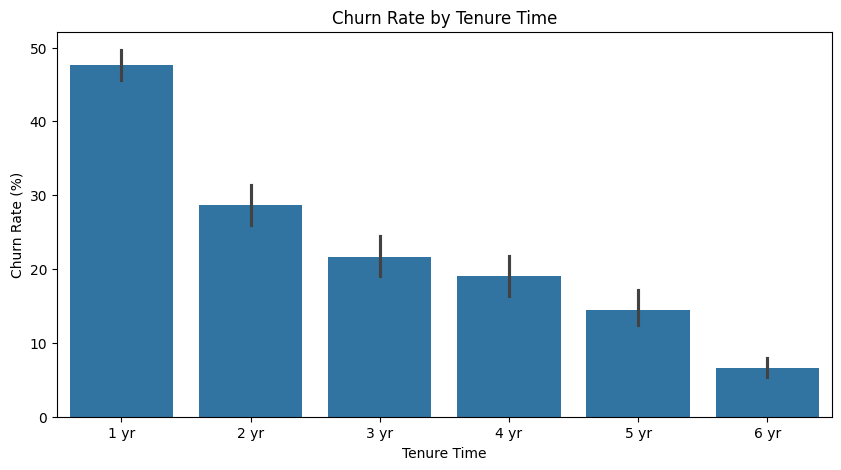

In [26]:
years = ['1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6 yr']
bins = [0, 12, 24, 36, 48, 60, 72]
df_charges['tenure_grp'] = pd.cut(df_charges['tenure'], bins = bins, labels = years)

# draw a barplot
fig = plt.figure(figsize = (10,5))
sns.barplot(x = 'tenure_grp', y = df_charges.Churn_val*100, data = df_charges)
plt.title('Churn Rate by Tenure Time')
plt.xlabel('Tenure Time')
plt.ylabel('Churn Rate (%)')
plt.show()

### Churn Rate based on Contract

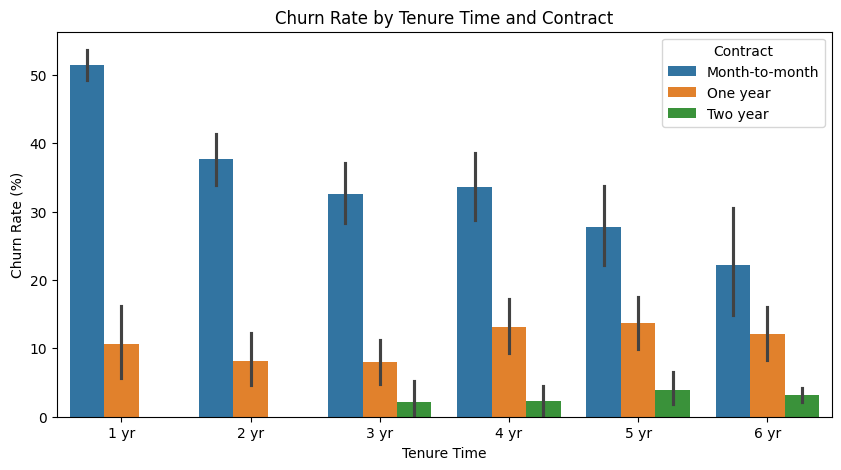

In [27]:
# churn rate based on payment contract
plt.figure(figsize = (10,5))
sns.barplot(x = 'tenure_grp', y = df_charges.Churn_val*100, hue = 'Contract', data = df_charges)
plt.title('Churn Rate by Tenure Time and Contract')
plt.xlabel('Tenure Time')
plt.ylabel('Churn Rate (%)')
plt.show()

### Churn Rate of Multiple Service

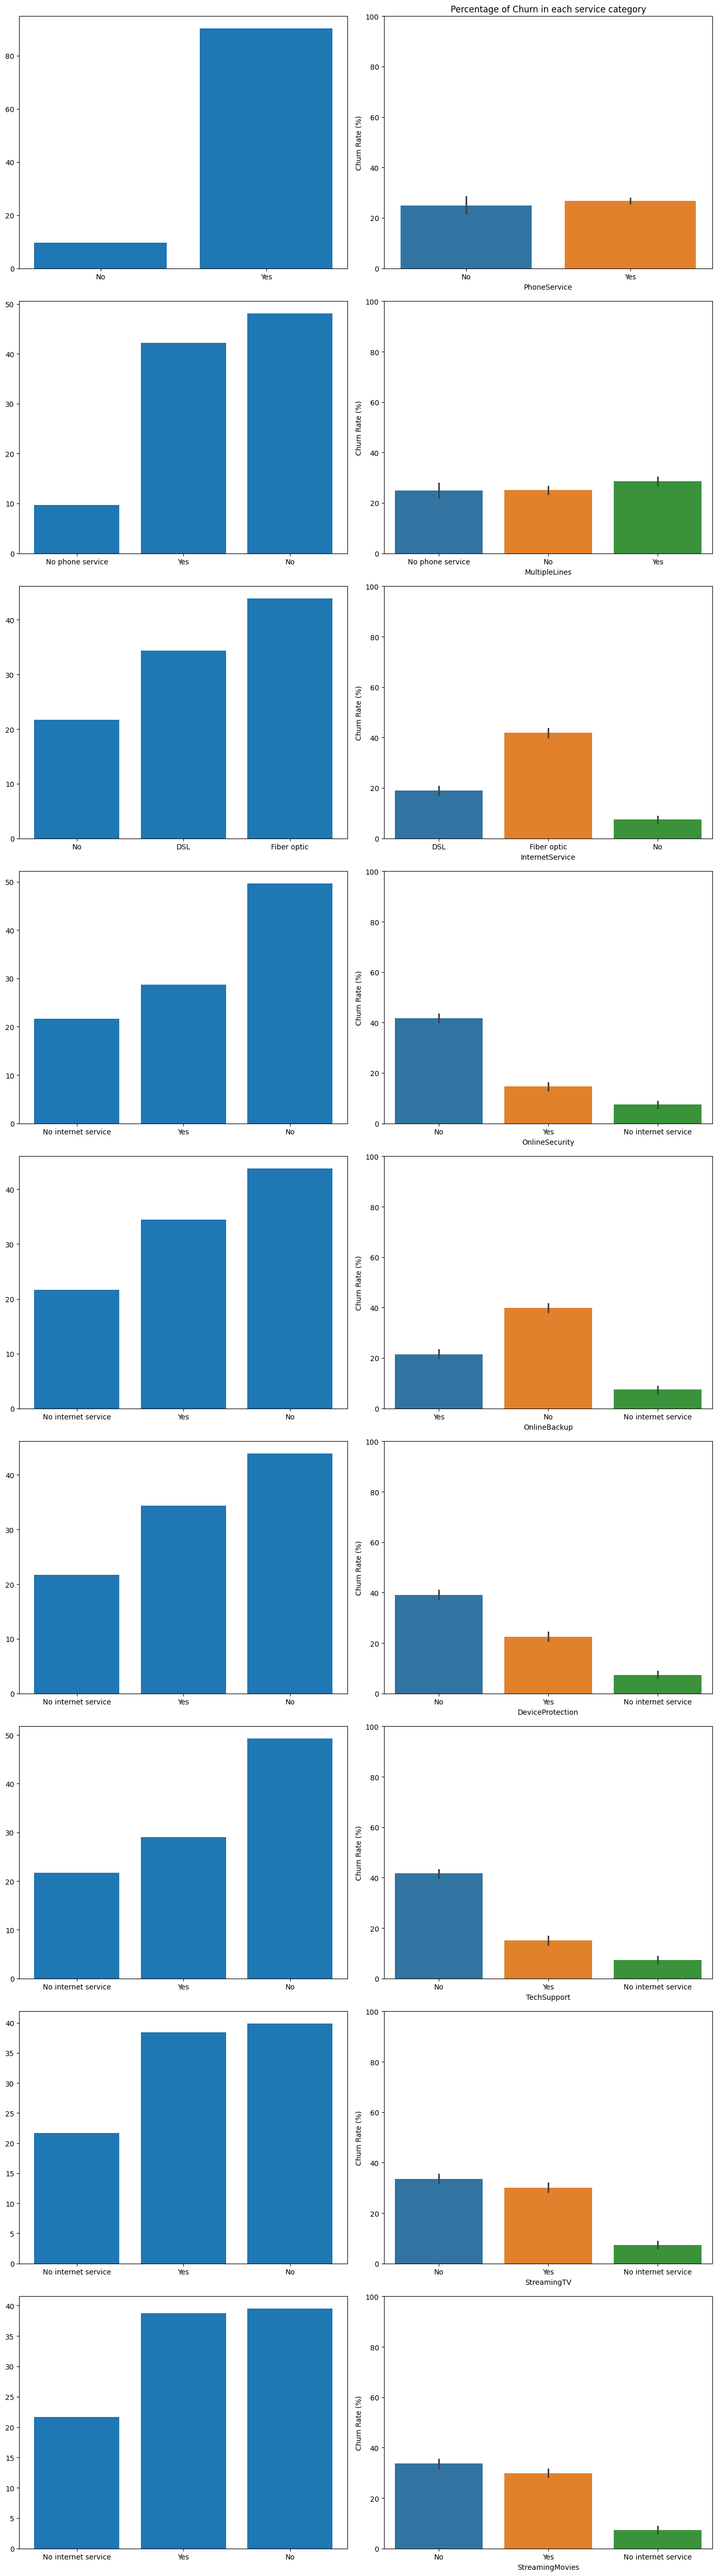

In [28]:
services_churn = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn', 'Churn_val']

df_service = df[services_churn].toPandas()
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 2
rows = len(services)
fig = plt.figure(figsize = (14,50))
idx = 0
for serviceType in enumerate(services):
  data = df_service[serviceType[1]].value_counts(normalize = True).sort_values()

  i = 0
  for i in range (n_cols):
    idx += 1
    axes = fig.add_subplot(rows, n_cols, idx)

    if idx%2 != 0:
      axes.bar(data.index, data*100)

    else:
      sns.barplot(x = serviceType[1], y = df_service.Churn_val*100, data = df_service, ax = axes, hue = serviceType[1])
      if idx == 1: axes.set_title('Distribution of Service Users')
      if idx == 2: axes.set_title('Percentage of Churn in each service category')
      axes.set_ylabel('Churn Rate (%)')
      axes.set_xlabel(serviceType[1])
      axes.set_ylim(0,100)


fig.tight_layout()
plt.show()

## Monthly and Total Charges based on Tenure and Churn

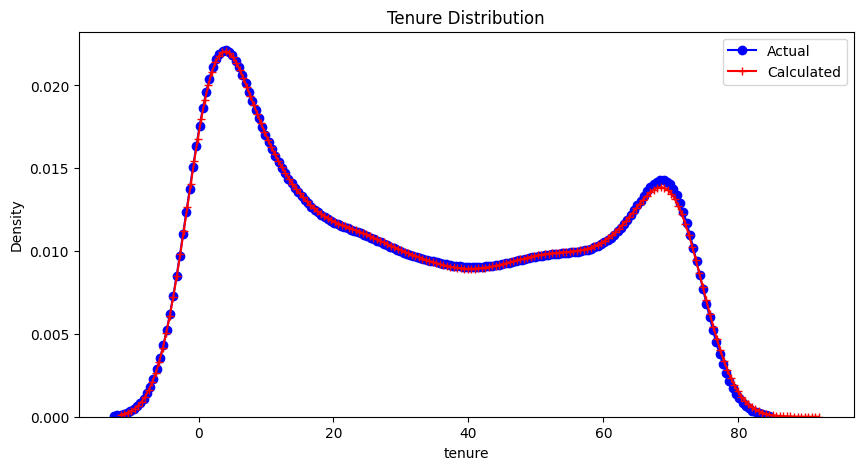

In [29]:
charges = ['MonthlyCharges', 'TotalCharges', 'Churn', 'tenure', 'Churn_val', 'Contract']
df_charges = df[charges].toPandas()

# Visualize monthly and total charges
tenure_calc = df_charges.TotalCharges/df_charges.MonthlyCharges
plt.figure(figsize = (10,5))
sns.kdeplot(df_charges.tenure, marker = 'o', c = 'b', label = 'Actual')
sns.kdeplot(tenure_calc, marker = '+', c = 'r', label = 'Calculated')
plt.title("Tenure Distribution")
plt.legend()
plt.show()

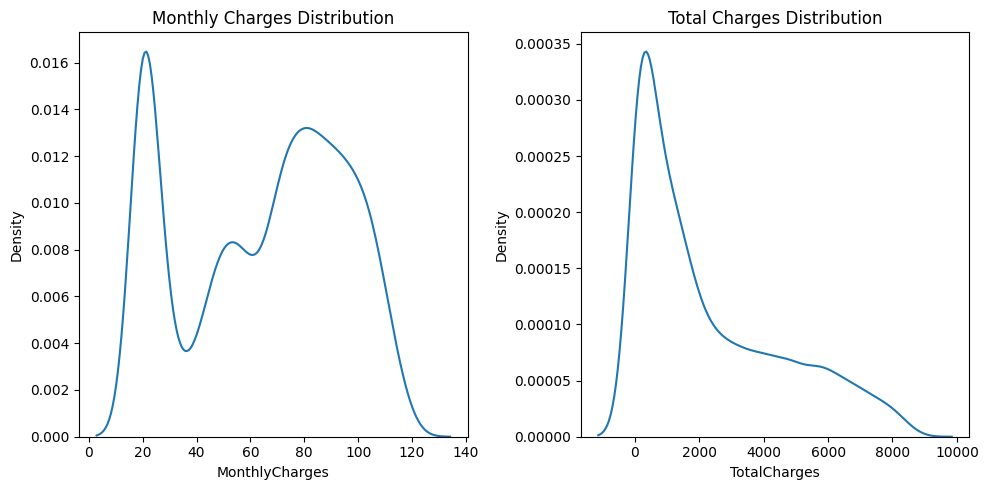

In [30]:
# distribution both monthly and total charges
fig, axs = plt.subplots(1,2, figsize = (10,5))
sns.kdeplot(df_charges.MonthlyCharges, label = 'Monthly Charges', ax = axs[0])
sns.kdeplot(df_charges.TotalCharges, label  = 'Total Charges', ax = axs[1])
axs[0].set_title('Monthly Charges Distribution')
axs[1].set_title('Total Charges Distribution')
fig.tight_layout()
plt.show()

# Machine Learning using Pyspark

In [31]:
# create machine learning using pyspark
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.sql.types import StringType
string_cols = df.select([col_name for col_name, col_type in df.dtypes if col_type == 'string']).show()

+----------+------+-------+----------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+-----+
|customerID|gender|Partner|Dependents|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|Churn|
+----------+------+-------+----------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+-----+
|7590-VHVEG|Female|    Yes|        No|          No|No phone service|            DSL|                 No|                Yes|                 No|                 No|                 No|                 No|Mont

## Encode String Data Type / One Hot Encoder

In [32]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# Identify categorical columns (excluding the label and customerID)
categorical_cols = [col_name for col_name, col_type in df.dtypes if col_type == 'string' and col_name != 'Churn' and col_name != 'customerID']

# Create StringIndexer stages for each categorical column
string_indexers = [StringIndexer(inputCol=col, outputCol=col + "_indexed", handleInvalid="keep") for col in categorical_cols]

# Create OneHotEncoder stages for each indexed categorical column
encoder_cols = [col + "_indexed" for col in categorical_cols]
one_hot_encoders = [OneHotEncoder(inputCol=col, outputCol=col + "_onehot") for col in encoder_cols]

# Create a pipeline to chain the stages
pipeline = Pipeline(stages=string_indexers + one_hot_encoders)

# Fit the pipeline to the data and transform the DataFrame
df_encoded = pipeline.fit(df).transform(df)

# Show the schema and some data with the new encoded columns
df_encoded.select(categorical_cols + [col + "_onehot" for col in encoder_cols]).show(5)

+------+-------+----------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+---------------------+----------------------+-------------------------+---------------------------+----------------------------+------------------------------+-----------------------------+---------------------------+-------------------------------+--------------------------+--------------------------+------------------------------+-----------------------+-------------------------------+----------------------------+
|gender|Partner|Dependents|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|gender_indexed_onehot|Partner_indexed_onehot|Dependents_indexed_onehot|PhoneService_indexed_onehot|MultipleLines_indexed_onehot|InternetService_indexed_onehot

## Encode Numeric Data

In [33]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler
from pyspark.sql.functions import col, when

# Select numerical columns to scale
numerical_cols = ['MonthlyCharges', 'TotalCharges']

# Replace null values in 'TotalCharges' with 0 and also handle potential empty strings if they exist
df_cleaned = df_encoded.withColumn('TotalCharges', when(col('TotalCharges').isNull() | (col('TotalCharges') == ''), 0).otherwise(col('TotalCharges')))


# Create a VectorAssembler to combine numerical features into a single vector column
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="numerical_features")
df_assembled = assembler.transform(df_cleaned)

# Create a MinMaxScaler
scaler = MinMaxScaler(inputCol="numerical_features", outputCol="scaled_numerical_features")

# Fit the scaler to the data and transform the DataFrame
scaler_model = scaler.fit(df_assembled)
df_scaled = scaler_model.transform(df_assembled)

# Show the scaled features
df_scaled.select('numerical_features', 'scaled_numerical_features').show(5)

+------------------+-------------------------+
|numerical_features|scaled_numerical_features|
+------------------+-------------------------+
|     [29.85,29.85]|     [0.11542288557213...|
|    [56.95,1889.5]|     [0.38507462686567...|
|    [53.85,108.15]|     [0.35422885572139...|
|    [42.3,1840.75]|     [0.23930348258706...|
|     [70.7,151.65]|     [0.52189054726368...|
+------------------+-------------------------+
only showing top 5 rows



## Drop Columns

In [34]:
col_drop = [col for col in df_encoded.columns if col.endswith('_indexed') or col.endswith('_onehot')]
# Add 'Churn' to the list of columns to include
new_data = df_encoded.select(col_drop + ['Churn'])
new_data.show()
#df_encoded = df_encoded.drop(*col_drop)

+--------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+---------------------+----------------------+-------------------------+---------------------------+----------------------------+------------------------------+-----------------------------+---------------------------+-------------------------------+--------------------------+--------------------------+------------------------------+-----------------------+-------------------------------+----------------------------+-----+
|gender_indexed|Partner_indexed|Dependents_indexed|PhoneService_indexed|MultipleLines_indexed|InternetService_indexed|OnlineSecurity_indexed|OnlineBackup_indexed|DeviceProtection_indexed|TechSupport_indexed|StreamingTV_indexed|StreamingMovies_indexed|Contract

### Combine all feature into one column with Vector Assembler

In [35]:
from pyspark.ml.feature import VectorAssembler
feature_assemble = VectorAssembler(inputCols = [col for col in new_data.columns if col != 'Churn'], outputCol='ind_features', handleInvalid = 'keep')
out_df = feature_assemble.transform(new_data)
out_df.show()

+--------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+---------------------+----------------------+-------------------------+---------------------------+----------------------------+------------------------------+-----------------------------+---------------------------+-------------------------------+--------------------------+--------------------------+------------------------------+-----------------------+-------------------------------+----------------------------+-----+--------------------+
|gender_indexed|Partner_indexed|Dependents_indexed|PhoneService_indexed|MultipleLines_indexed|InternetService_indexed|OnlineSecurity_indexed|OnlineBackup_indexed|DeviceProtection_indexed|TechSupport_indexed|StreamingTV_indexed|StreamingMo

### Evaluate the Model Performance

In [36]:
from pyspark.ml.feature import StringIndexer

label_indexer = StringIndexer(inputCol='Churn', outputCol='label')
out_df = label_indexer.fit(out_df).transform(out_df)

# Split data into training and testing sets
train_data, test_data = out_df.randomSplit([0.7, 0.3], seed=42)

# Show the count of rows in training and testing datasets
print("Training Dataset Count:", train_data.count())
print("Testing Dataset Count:", test_data.count())

Training Dataset Count: 5036
Testing Dataset Count: 2007


Now that the data is prepared, we can train a machine learning model. Let's start with a Logistic Regression model.

In [37]:
from pyspark.ml.classification import LogisticRegression

# Create a Logistic Regression model with parameters
lr = LogisticRegression(featuresCol='ind_features', labelCol='label',
                        regParam=0.01, elasticNetParam=0.5, maxIter=100, tol=1e-6) # Example parameters

# Train the model
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Show the predictions
predictions.select('label', 'prediction', 'probability').show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       1.0|[0.34270191683446...|
|  0.0|       1.0|[0.34270191683446...|
|  0.0|       1.0|[0.34270191683446...|
|  0.0|       1.0|[0.34270191683446...|
|  1.0|       1.0|[0.34270191683446...|
|  1.0|       1.0|[0.34270191683446...|
|  1.0|       1.0|[0.34270191683446...|
|  1.0|       1.0|[0.34270191683446...|
|  1.0|       1.0|[0.34270191683446...|
|  1.0|       1.0|[0.34270191683446...|
+-----+----------+--------------------+
only showing top 10 rows



In [38]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Evaluate the model
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='label', metricName='areaUnderROC')
auc = binary_evaluator.evaluate(predictions)

multiclass_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = multiclass_evaluator.evaluate(predictions)

multiclass_evaluator.setMetricName('precisionByLabel')
precision = multiclass_evaluator.evaluate(predictions)

multiclass_evaluator.setMetricName('recallByLabel')
recall = multiclass_evaluator.evaluate(predictions)

multiclass_evaluator.setMetricName('f1')
f1 = multiclass_evaluator.evaluate(predictions)

print(f"Area Under ROC: {auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Area Under ROC: 0.8312591284893648
Accuracy: 0.7872446437468859
Precision: 0.8369768894440974
Recall: 0.8897742363877822
F1 Score: 0.7793551660520514


Let's train a Decision Tree Classifier to see feature importances.

In [39]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler

# Create a VectorAssembler to combine all feature columns into a single vector
# Make sure to include all relevant feature columns here.
# Based on previous cells, 'ind_features' is the column containing the assembled features.
# If you want to include scaled numerical features or one-hot encoded categorical features,
# adjust the inputCols accordingly.
feature_assembler = VectorAssembler(
    inputCols=[col for col in out_df.columns if col != 'Churn' and col != 'label'],
    outputCol="features",
    handleInvalid="keep"
)

# Transform the data using the feature assembler
data_with_features = feature_assembler.transform(out_df)

# Create a Decision Tree Classifier model
dt = DecisionTreeClassifier(labelCol='label', featuresCol='features')

# Train the model
dt_model = dt.fit(data_with_features)

# Get feature importances
feature_importances = dt_model.featureImportances

# Get the names of the features
feature_names = feature_assembler.getInputCols()

# Create a list of tuples with feature names and their importances
feature_importance_list = [(name, importance) for name, importance in zip(feature_names, feature_importances)]

# Sort the features by importance in descending order
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Print the feature importances
print("Feature Importances (Decision Tree):")
for name, importance in feature_importance_list:
    print(f"{name}: {importance}")

Feature Importances (Decision Tree):
Contract_indexed: 0.6548430658559552
InternetService_indexed: 0.19411118331969376
OnlineSecurity_indexed: 0.044563400063918464
PaymentMethod_indexed: 0.043528316056556875
OnlineBackup_indexed: 0.03929979194741673
TechSupport_indexed: 0.01831534675674312
StreamingTV_indexed: 0.005338895999715688
gender_indexed: 0.0
Partner_indexed: 0.0
Dependents_indexed: 0.0
PhoneService_indexed: 0.0
MultipleLines_indexed: 0.0
DeviceProtection_indexed: 0.0
StreamingMovies_indexed: 0.0
PaperlessBilling_indexed: 0.0
gender_indexed_onehot: 0.0
Partner_indexed_onehot: 0.0
Dependents_indexed_onehot: 0.0
PhoneService_indexed_onehot: 0.0
MultipleLines_indexed_onehot: 0.0
InternetService_indexed_onehot: 0.0
OnlineSecurity_indexed_onehot: 0.0
OnlineBackup_indexed_onehot: 0.0
DeviceProtection_indexed_onehot: 0.0
TechSupport_indexed_onehot: 0.0
StreamingTV_indexed_onehot: 0.0
StreamingMovies_indexed_onehot: 0.0
Contract_indexed_onehot: 0.0
PaperlessBilling_indexed_onehot: 0.0


With the model trained and predictions made, the next step is to **Evaluate the Model Performance**.

### Visualize Feature Importances

/tmp/ipython-input-888521882.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=filtered_fi_df, palette='viridis')


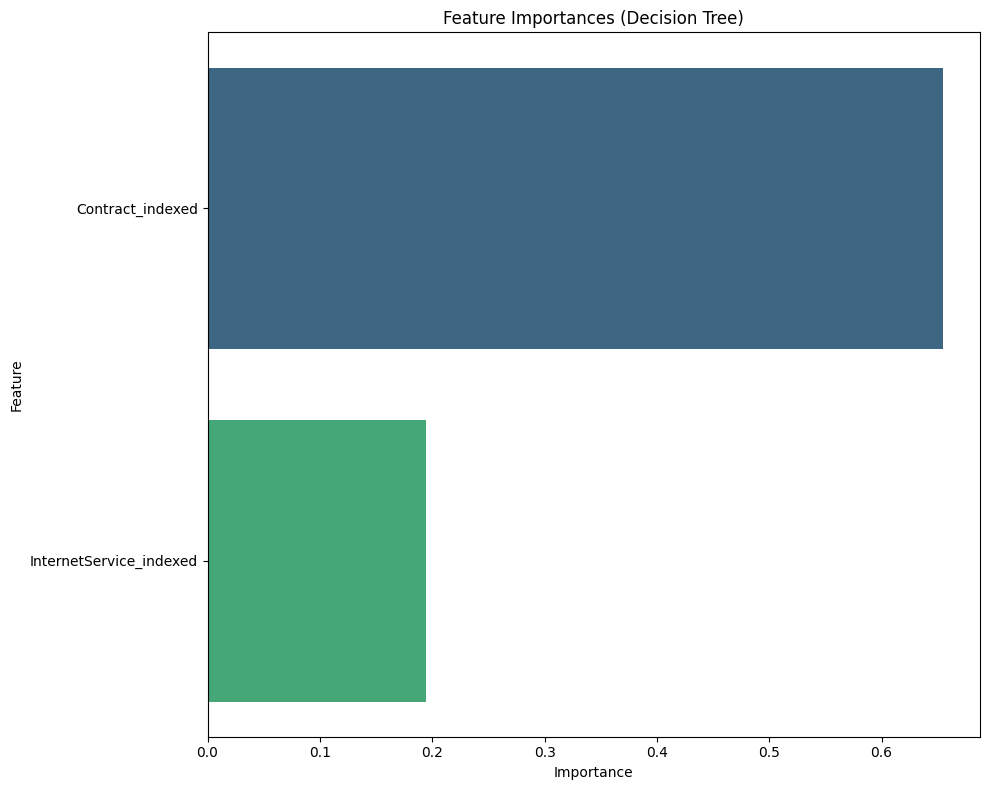

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the feature importance list to a pandas DataFrame for easier plotting
feature_importance_df = pd.DataFrame(feature_importance_list, columns=['Feature', 'Importance'])

# Sort the DataFrame by importance for better visualization
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
filtered_fi_df = feature_importance_df[feature_importance_df['Importance'] >0.05]

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=filtered_fi_df, palette='viridis')
plt.title('Feature Importances (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [41]:
# Get the coefficients of the Logistic Regression model and convert them to a list
lr_coefficients_list = [float(c) for c in lr_model.coefficients]

# Create a pandas DataFrame with feature names and coefficients
coef_df = pd.DataFrame(list(zip(feature_assembler.getInputCols(), lr_coefficients_list)), columns=['Feature', 'Coefficient'])
coef_df

,Feature,Coefficient
0,gender_indexed,0.000000
1,Partner_indexed,-0.074235
2,Dependents_indexed,-0.024512
3,PhoneService_indexed,0.000000
4,MultipleLines_indexed,0.000000
5,InternetService_indexed,0.000000
6,OnlineSecurity_indexed,0.000000
7,OnlineBackup_indexed,0.000000
8,DeviceProtection_indexed,0.000000
9,TechSupport_indexed,0.000000


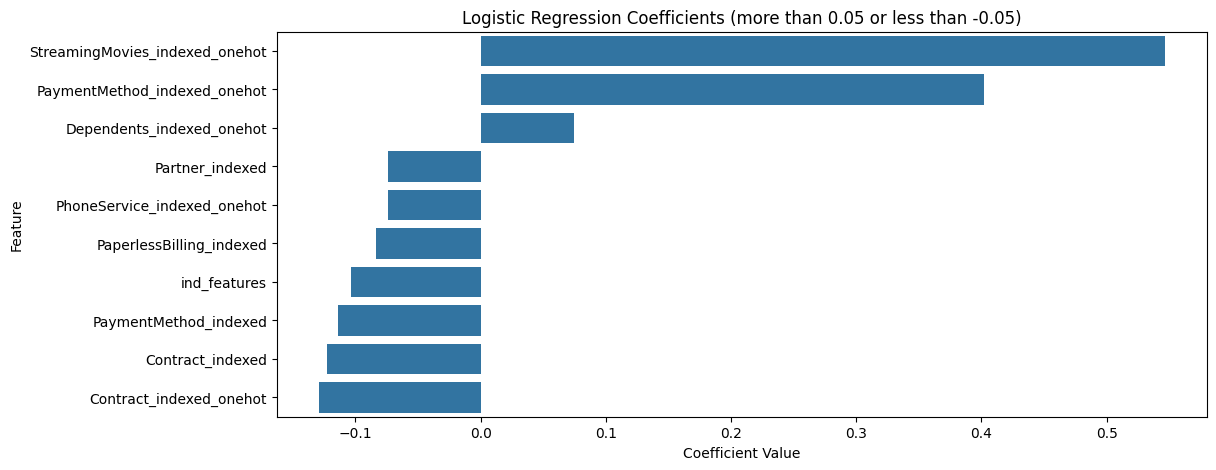

In [42]:
plt.figure(figsize = (12,5))
# Filter coefficients greater than 0.05 or less than -0.05
filtered_coef_df = coef_df[(coef_df['Coefficient'] > 0.05) | (coef_df['Coefficient'] < -0.05)]

# Sort for better visualization
filtered_coef_df = filtered_coef_df.sort_values('Coefficient', ascending=False)

# Check if there are any coefficients to plot
if not filtered_coef_df.empty:
    sns.barplot(x = 'Coefficient', y = 'Feature', data = filtered_coef_df)
    plt.title('Logistic Regression Coefficients (more than 0.05 or less than -0.05)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()
else:
    print("No coefficients with absolute value greater than 0.05 to plot.")